In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup as BS
import pandas as pd
import re
import requests
import os
import lxml

In [2]:
from Source.ScrapePlayersWages import Scrape_Wage

In [19]:
leagues = ["La_Liga", "Premier_League", 
           "Seria_A", "Bundesliga", 
           "Ligue_1", "Liga_Nos"]
LeaguesDict = {}
for i in leagues:
    LeaguesDict[i] = Scrape_Wage(i)
    LeaguesDict[i] = LeaguesDict[i].sort_values('Weekly Wage',
                                                ascending = False)
    LeaguesDict[i] = LeaguesDict[i].groupby("Team").nth([i for i in range(11)]
                                                        ).reset_index()[['Player Name',
                                                                         'Weekly Wage',
                                                                         'Age', 'Team']]
    LeaguesDict[i] = LeaguesDict[i].groupby("Team")['Weekly Wage'].agg(['mean']).reset_index()
    
    LeaguesDict[i] = LeaguesDict[i].sort_values('mean', ascending = False).reset_index(drop=True)
    LeaguesDict[i] = LeaguesDict[i].set_index("Team")
    LeaguesDict[i] = LeaguesDict[i].rename(columns = {"mean":"Average Wage of top 11 Earners of each Team"})

Extracting page:  1
A. Bilbao
Extracting page:  2
A. Madrid
Extracting page:  3
Barcelona
Extracting page:  4
Real Hispalis
Extracting page:  5
Cádiz
Extracting page:  6
Vigo
Extracting page:  7
Eibar
Extracting page:  8
Elche
Extracting page:  9
Espanyol
Extracting page:  10
Getafe
Extracting page:  11
Girona
Extracting page:  12
La Liga - Highest Pai
Extracting page:  13
Huesca
Extracting page:  14
Leganés
Extracting page:  15
Mallorca
Extracting page:  16
Atlético Pamplona
Extracting page:  17
Real Madrid
Extracting page:  18
Real San Sebastián
Extracting page:  19
Valladolid
Extracting page:  20
Sevilla
Extracting page:  21
Valencia
Extracting page:  22
Villarreal
Extracting page:  1
AFC Bournemouth
Extracting page:  2
Arsenal
Extracting page:  3
Aston Villa
Extracting page:  4
Brentford
Extracting page:  5
Brighton and Hove Albion
Extracting page:  6
Chelsea
Extracting page:  7
Crystal Palace
Extracting page:  8
Everton
Extracting page:  9
Fulham
Extracting page:  10
Premier Leagu

In [4]:
for j in leagues:
    print("")
    print(j)
    print(LeaguesDict[j])
    print("")


La_Liga
                             mean
Team                             
Real Madrid         242727.272727
Barcelona           192727.272727
A. Madrid           167181.818182
A. Bilbao            70727.272727
Sevilla              68000.000000
Real San Sebastián   42363.636364
Real Hispalis        39181.818182
Villarreal           39181.818182
Vigo                 36090.909091
Getafe               35727.272727
Valencia             31727.272727
Girona               19945.454545
Mallorca             19172.727273
Elche                18909.090909
Espanyol             16263.636364
Atlético Pamplona    15309.090909
Cádiz                14909.090909
Valladolid           14281.818182
Leganés              10390.909091
Eibar                 7190.909091
Huesca                7090.909091


Premier_League
                                   mean
Team                                   
Manchester United         248636.363636
Manchester City           218636.363636
Chelsea                   216363

In [4]:
LeaguesDict.keys()

dict_keys(['La_Liga', 'Premier_League', 'Seria_A', 'Bundesliga', 'Ligue_1', 'Liga_Nos'])

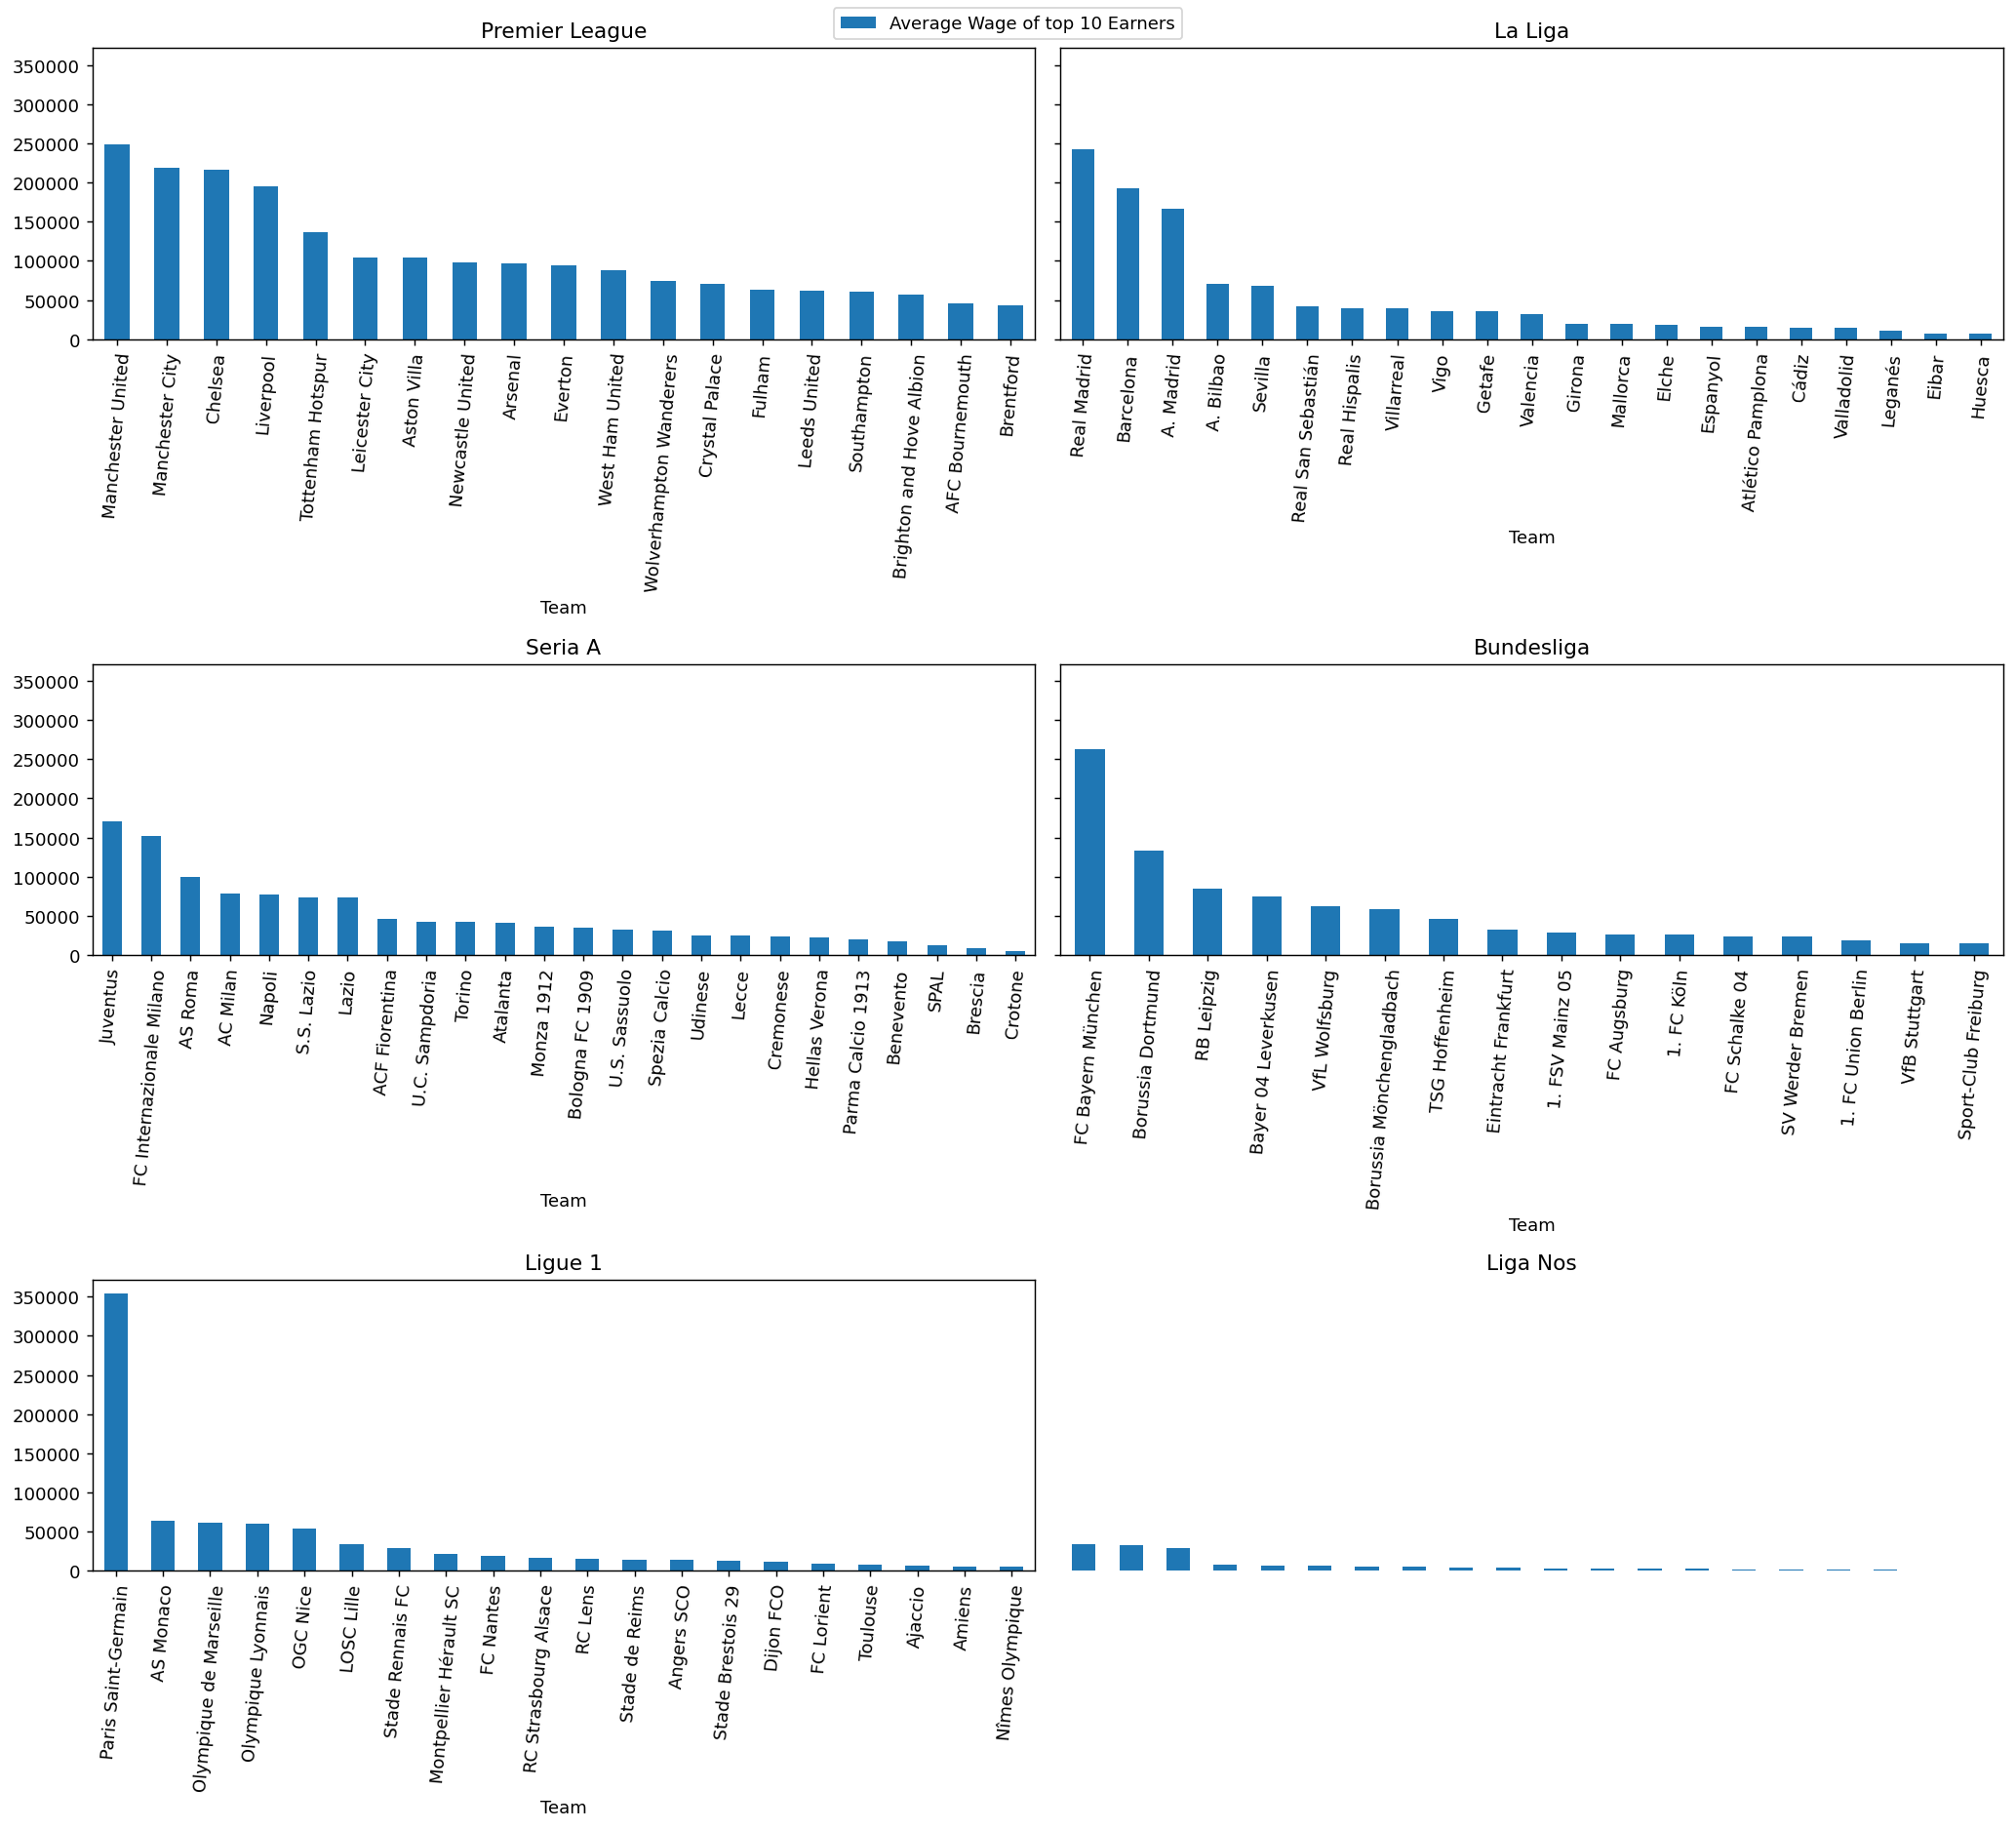

In [18]:
plt.rcParams.update({'figure.figsize':(16,15), 'figure.dpi':130})
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey=True)


axes[0, 0].set_title('Premier League')
LeaguesDict["Premier_League"].plot(ax=axes[0, 0], kind = "bar", legend=0,  rot=85)

axes[0, 1].set_title('La Liga')
LeaguesDict["La_Liga"].plot(ax=axes[0, 1], kind = "bar", legend=0,  rot=85)

axes[1, 0].set_title('Seria A')
LeaguesDict["Seria_A"].plot(ax=axes[1, 0], kind = "bar", legend=0,  rot=85)

axes[1, 1].set_title('Bundesliga')
LeaguesDict["Bundesliga"].plot(ax=axes[1, 1], kind = "bar", legend=0,  rot=85)

axes[2, 0].set_title('Ligue 1')
LeaguesDict["Ligue_1"].plot(ax=axes[2, 0], kind = "bar", legend=0,  rot=85)

axes[2, 1].set_title('Liga Nos')
LeaguesDict["Liga_Nos"].plot(ax=axes[2, 1], kind = "bar", legend=0,  rot=85)

handles, labels = axes[2,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.axis('off')

plt.show()

In [3]:
Ligue_1 = Scrape_Wage("Ligue_1")

In [7]:
Ligue_1[Ligue_1["Team"] == "Paris Saint-Germain"][['Player Name', 'Weekly Wage', 'Yearly Salary', 'Age', 'Position',
       'Nationality', 'Team']]

,Player Name,Weekly Wage,Yearly Salary,Age,Position,Nationality,Team
390,Kylian Mbappé,827000.0,43004000.0,23.0,"AM RL, ST",France,Paris Saint-Germain
391,Neymar,810000.0,42120000.0,30.0,"AM LC, F C",Brazil,Paris Saint-Germain
392,Lionel Messi,670000.0,34840000.0,35.0,"AM RC, F C",Argentina,Paris Saint-Germain
393,Marquinhos,238000.0,12376000.0,28.0,"D C, DM",Brazil,Paris Saint-Germain
394,Marco Verratti,238000.0,12376000.0,29.0,DM,Italy,Paris Saint-Germain
395,Sergio Ramos,225000.0,11700000.0,36.0,D C,Spain,Paris Saint-Germain
396,Gianluigi Donnarumma,215000.0,11180000.0,23.0,GK,Italy,Paris Saint-Germain
397,Keylor Navas,198000.0,10296000.0,35.0,GK,Costa Rica,Paris Saint-Germain
398,Achraf Hakimi,172000.0,8944000.0,23.0,D/WB/M R,Morocco,Paris Saint-Germain
399,Presnel Kimpembe,165000.0,8580000.0,26.0,D C,France,Paris Saint-Germain


In [6]:
Ligue_1.columns

Index(['Player Name', 'Weekly Wage', 'Yearly Salary', 'Age', 'Position',
       'Nationality', 'Team', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')